In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
MouseData = pd.read_csv(mouse_drug_data_to_load)
TrialData = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
CompleteDrugData = pd.merge(TrialData,MouseData, on='Mouse ID')

CompleteDrugData = CompleteDrugData.sort_values(by=['Timepoint','Metastatic Sites'])

CompleteDrugData = CompleteDrugData.reset_index()

CompleteDrugData = CompleteDrugData[['Mouse ID','Timepoint','Tumor Volume (mm3)','Metastatic Sites','Drug']]


# Display the data table for preview
CompleteDrugData.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
Avg_Tumor_Volume_Data = CompleteDrugData.groupby(['Drug', 'Timepoint'])
Avg_Tumor2_Volume_Data = Avg_Tumor_Volume_Data['Tumor Volume (mm3)'].mean()

# Convert to DataFrame
Avg_Tumor2_Volume_Data3 = pd.DataFrame(Avg_Tumor2_Volume_Data)

# Preview DataFrame
Avg_Tumor2_Volume_Data3 = Avg_Tumor2_Volume_Data3.reset_index()
Avg_Tumor2_Volume_Data3.head(12)


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [10]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
Avg_Tumor_Volume_Data = CompleteDrugData.groupby(['Drug', 'Timepoint'])
Avg_Tumor2_Volume_Data4 = Avg_Tumor_Volume_Data['Tumor Volume (mm3)'].sem()
# Convert to DataFrame
Avg_Tumor2_Volume_Data5 = pd.DataFrame(Avg_Tumor2_Volume_Data4)
# Preview DataFrame
Avg_Tumor2_Volume_Data5 = Avg_Tumor2_Volume_Data5.reset_index()
Avg_Tumor2_Volume_Data5 = Avg_Tumor2_Volume_Data5[['Drug','Timepoint','Tumor Volume (mm3)']]
Avg_Tumor2_Volume_Data5.head(5)


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [12]:
Avg_Tumor2_Volume_Data6 = Avg_Tumor2_Volume_Data3.pivot_table(values="Tumor Volume (mm3)",columns='Drug',index="Timepoint")
Avg_Tumor2_Volume_Data6.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [13]:
# Minor Data Munging to Re-Format the Data Frames
Avg_Tumor2_Volume_Data7 = Avg_Tumor2_Volume_Data5.pivot_table(values="Tumor Volume (mm3)",columns='Drug',index="Timepoint")


# Preview that Reformatting worked
Avg_Tumor2_Volume_Data7.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


TypeError: ('Capomulin', 0) is not a string

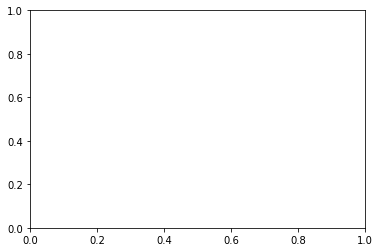

In [46]:
# Generate the Plot (with Error Bars)
fig,ax = plt.subplots()

ax.errorbar(Avg_Tumor2_Volume_Data6.index,Avg_Tumor2_Volume_Data6["Capomulin"],yerr=Avg_Tumor2_Volume_Data7["Capomulin"],fmt="d:c",label="Capomulin")
ax.errorbar(Avg_Tumor2_Volume_Data6.index,Avg_Tumor2_Volume_Data6["Infubinol"],yerr=Avg_Tumor2_Volume_Data7["Infubinol"],fmt="^:m",label="Infubinol")
ax.errorbar(Avg_Tumor2_Volume_Data6.index,Avg_Tumor2_Volume_Data6["Ketapril"],yerr=Avg_Tumor2_Volume_Data7["Ketapril"],fmt="s:r",label="Ketapril")
ax.errorbar(Avg_Tumor2_Volume_Data6.index,Avg_Tumor2_Volume_Data6["Placebo"],yerr=Avg_Tumor2_Volume_Data7["Placebo"],fmt="o:g",label="Placebo")
plt.title("Tumor Response to Treatment")
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Tumor Volume (mm3)")
plt.grid(axis="y")
plt.legend(loc="best",fontsize="small",fancybox=True)

# Save the Figure
plt.savefig("Metastatic Spread During Treatment")
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [31]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
MetMean_Site_Data = CompleteDrugData.groupby(["Drug","Timepoint"]).mean()['Metastatic Sites']

# Convert to DataFrame
MetMean_Site_Data_df = pd.DataFrame(Avg_Tumor2_Volume_Data6)

# Preview DataFrame
MetMean_Site_Data_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [35]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
MetSem_Site_Data = CompleteDrugData.groupby(["Drug","Timepoint"]).sem()["Metastatic Sites"]
# Convert to DataFrame
MetSem_Site_Data_df = pd.DataFrame(MetSem_Site_Data)
# Preview DataFrame
MetSem_Site_Data_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [36]:
# Minor Data Munging to Re-Format the MetMean_Site_Data_df Data Frame
MetMean_Site_Data_df = MetMean_Site_Data_df.pivot_table(values = "Metastatic Sites",columns = "Drug",index="Timepoint")
# Preview that Reformatting worked
MetMean_Site_Data_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [37]:
# Minor Data Munging to Re-Format the Met_Sem_df Data Frame
MetSem_Site_Data_df = MetSem_Site_Data_df.pivot_table(values = "Metastatic Sites",columns = "Drug",index="Timepoint")
# Preview that Reformatting worked
MetSem_Site_Data_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


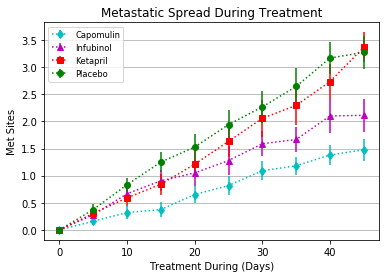

In [47]:
# Generate the Plot
fig,ax = plt.subplots()

ax.errorbar(MetMean_Site_Data_df.index,MetMean_Site_Data_df["Capomulin"],yerr=MetSem_Site_Data_df["Capomulin"],fmt="d:c",label="Capomulin")
ax.errorbar(MetMean_Site_Data_df.index,MetMean_Site_Data_df["Infubinol"],yerr=MetSem_Site_Data_df["Infubinol"],fmt="^:m",label="Infubinol")
ax.errorbar(MetMean_Site_Data_df.index,MetMean_Site_Data_df["Ketapril"],yerr=MetSem_Site_Data_df["Ketapril"],fmt="s:r",label="Ketapril")
ax.errorbar(MetMean_Site_Data_df.index,MetMean_Site_Data_df["Placebo"],yerr=MetSem_Site_Data_df["Placebo"],fmt="o:g",label="Placebo")
plt.title("Metastatic Spread During Treatment")
ax.set_xlabel("Treatment During (Days)")
ax.set_ylabel("Met Sites")
plt.grid(axis="y")
plt.legend(loc="best",fontsize="small",fancybox=True)

# Save the Figure
plt.savefig("Metastatic Spread During Treatment")
# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [41]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
Mouse_Count = CompleteDrugData.groupby(["Drug","Timepoint"]).count()["Mouse ID"]
# Convert to DataFrame
Mouse_Count_df = pd.DataFrame(Mouse_Count)
Mouse_Count_df = Mouse_Count_df.reset_index()
Mouse_Count_df = Mouse_Count_df.rename(columns={"Mouse ID":"Mouse Count"})
# Preview DataFrame
Mouse_Count_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [42]:
# Minor Data Munging to Re-Format the Data Frames
Mouse_Count_df = Mouse_Count_df.pivot_table(values="Mouse Count",columns="Drug",index = "Timepoint")
# Preview the Data Frame
Mouse_Count_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


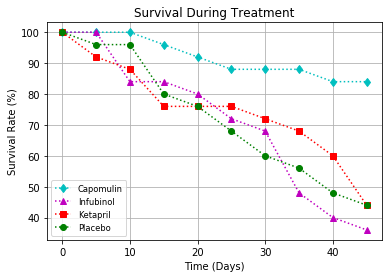

In [44]:
# Generate the Plot
fig,ax = plt.subplots()

ax.errorbar(Mouse_Count_df.index,Mouse_Count_df["Capomulin"]/Mouse_Count_df["Capomulin"].iloc[0]*100,fmt="d:c",label="Capomulin")
ax.errorbar(Mouse_Count_df.index,Mouse_Count_df["Infubinol"]/Mouse_Count_df["Infubinol"].iloc[0]*100,fmt="^:m",label="Infubinol")
ax.errorbar(Mouse_Count_df.index,Mouse_Count_df["Ketapril"]/Mouse_Count_df["Ketapril"].iloc[0]*100,fmt="s:r",label="Ketapril")
ax.errorbar(Mouse_Count_df.index,Mouse_Count_df["Placebo"]/Mouse_Count_df["Placebo"].iloc[0]*100,fmt="o:g",label="Placebo")
plt.title("Survival During Treatment")
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Survival Rate (%)")
plt.grid(axis="both")
plt.ylim(33,105)
plt.legend(loc="lower left",fontsize="small",fancybox=True)

# Save the Figure
plt.savefig("Survival During Treatment")
# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [50]:
# Calculate the percent changes for each drug
#Tumor_Percent_Change = 100 * (Avg_Tumor2_Volume_Data6.iloc[-1] - Avg_Tumor2_Volume_Data6.loc[0])/Avg_Tumor2_Volume_Data6.iloc[0]
# Display the data to confirm
#Tumor_Percent_Change

KeyError: 0

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)